In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("data.csv")
df.head()


,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [5]:
df.describe()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [ ]:
df_clean = df.drop(['Email', 'Address', 'Avatar'], axis=1)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time on App           500 non-null    float64
 1   Time on Website       500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)
scaled_df.head()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.611401,2.495700,0.547592,1.118638
1,-0.948861,0.207539,-0.874882,-1.351848
2,-0.727404,0.049052,0.567627,-0.148472
3,1.678419,-0.337261,-0.414080,1.041652
4,0.752328,0.474987,0.918237,1.263271


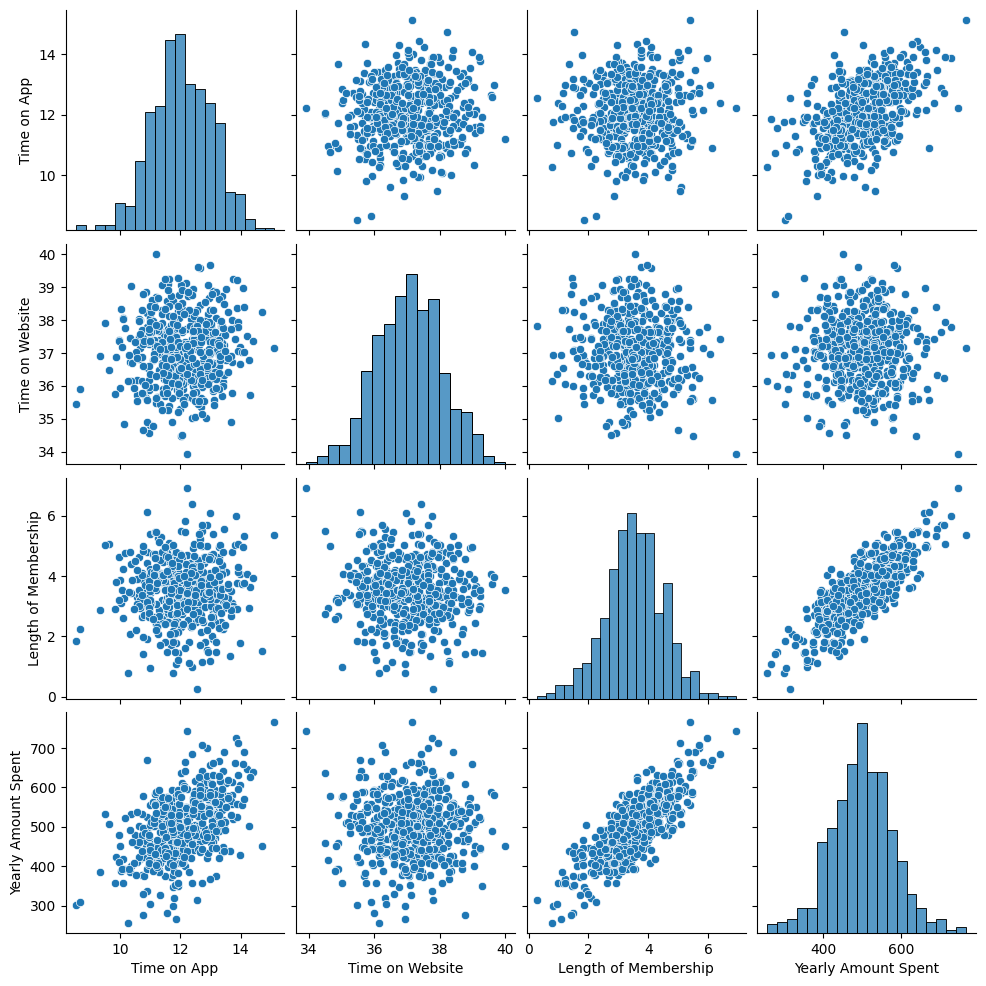

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_clean)
plt.show()


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,1.350890,2.022373
1,-1.837128,-0.058410
2,-0.040979,-0.563838
3,1.123346,0.816028
4,1.726688,0.448944


In [12]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)


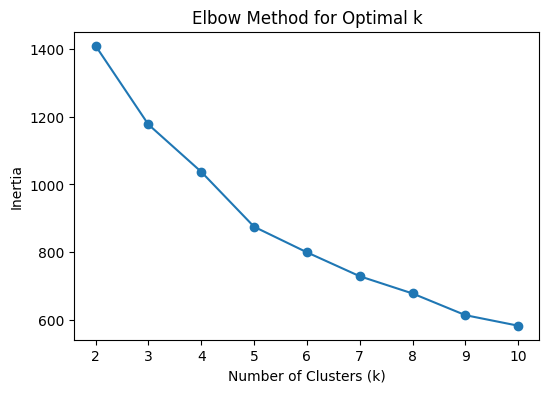

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

clusters[:10]


array([0, 1, 3, 0, 0, 3, 3, 3, 0, 1])

In [15]:
df_clean['Cluster'] = clusters
df_clean.head()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cluster
0,12.66,39.58,4.08,587.95,0
1,11.11,37.27,2.66,392.20,1
2,11.33,37.11,4.10,487.55,3
3,13.72,36.72,3.12,581.85,0
4,12.80,37.54,4.45,599.41,0


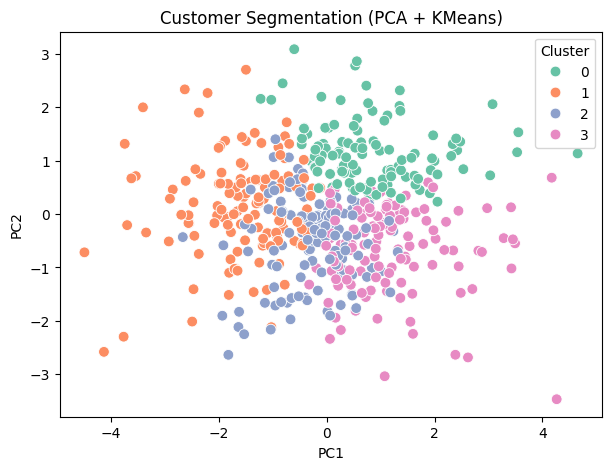

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df['Cluster'] = clusters

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='Set2',
    s=60
)
plt.title("Customer Segmentation (PCA + KMeans)")
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_df, clusters)
score


0.20736255961078445

In [18]:
df_clean.groupby('Cluster').mean()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Cluster,,,,
0,13.074054,37.891802,3.616306,546.702432
1,11.271077,37.423308,2.706077,410.944077
2,12.189248,36.164662,3.218647,483.219023
3,11.814921,36.899365,4.646032,565.732460


In [19]:
segment_names = {
    0: "High-Value Loyal Users",
    1: "Low Engagement Users",
    2: "Moderate Users",
    3: "Premium Loyal Customers"
}

df_clean['Customer_Segment'] = df_clean['Cluster'].map(segment_names)
df_clean.head()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cluster,Customer_Segment
0,12.66,39.58,4.08,587.95,0,High-Value Loyal Users
1,11.11,37.27,2.66,392.20,1,Low Engagement Users
2,11.33,37.11,4.10,487.55,3,Premium Loyal Customers
3,13.72,36.72,3.12,581.85,0,High-Value Loyal Users
4,12.80,37.54,4.45,599.41,0,High-Value Loyal Users


In [20]:
df_clean['Customer_Segment'].value_counts()


Customer_Segment
Moderate Users             133
Low Engagement Users       130
Premium Loyal Customers    126
High-Value Loyal Users     111
Name: count, dtype: int64

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [22]:
linked = linkage(scaled_df, method='ward')


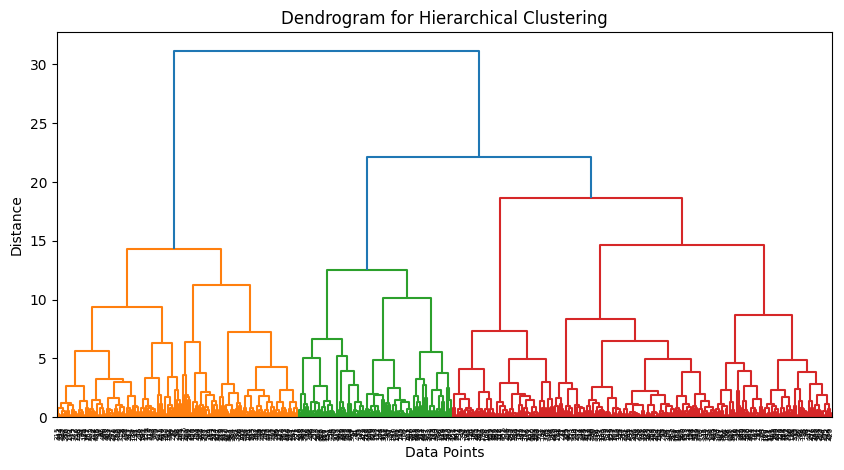

In [23]:
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [24]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_clusters = hc.fit_predict(scaled_df)

hc_clusters[:10]


array([1, 2, 3, 1, 1, 1, 3, 1, 1, 0], dtype=int64)

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_df)

dbscan_clusters[:10]


array([-1,  0,  0,  0,  0, -1,  0,  0,  0,  0], dtype=int64)

In [28]:
df_clean['DBSCAN_Cluster'] = dbscan_clusters
df_clean['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
 0    440
-1     60
Name: count, dtype: int64

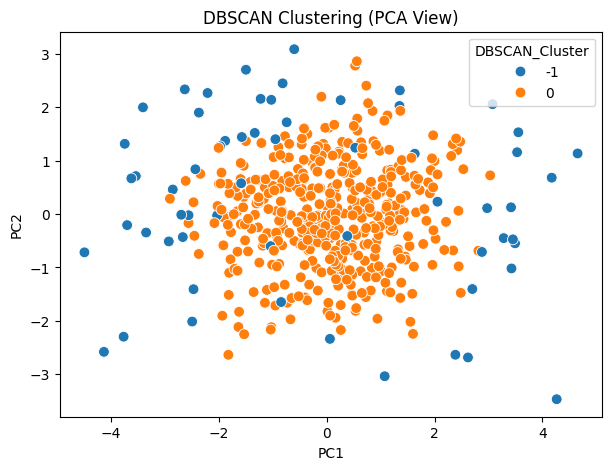

In [29]:
pca_df['DBSCAN_Cluster'] = dbscan_clusters

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    data=pca_df,
    palette='tab10',
    s=60
)
plt.title("DBSCAN Clustering (PCA View)")
plt.show()


In [30]:
df_clean['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
 0    440
-1     60
Name: count, dtype: int64

In [31]:
df_clean['Anomaly'] = df_clean['DBSCAN_Cluster'].apply(
    lambda x: 1 if x == -1 else 0
)

df_clean[['DBSCAN_Cluster', 'Anomaly']].head()


,DBSCAN_Cluster,Anomaly
0,-1,1
1,0,0
2,0,0
3,0,0
4,0,0


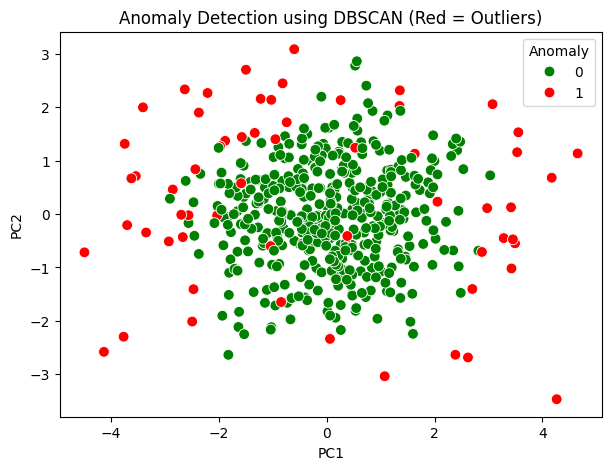

In [32]:
pca_df['Anomaly'] = df_clean['Anomaly']

plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Anomaly',
    data=pca_df,
    palette={0: 'green', 1: 'red'},
    s=60
)
plt.title("Anomaly Detection using DBSCAN (Red = Outliers)")
plt.show()


In [33]:
df_clean.groupby(['Customer_Segment', 'Anomaly']).size()


Customer_Segment         Anomaly
High-Value Loyal Users   0           97
                         1           14
Low Engagement Users     0          102
                         1           28
Moderate Users           0          129
                         1            4
Premium Loyal Customers  0          112
                         1           14
dtype: int64

In [34]:
comparison_df = pd.DataFrame({
    'KMeans_Cluster': df_clean['Cluster'],
    'Hierarchical_Cluster': hc_clusters
})

comparison_df.head()


,KMeans_Cluster,Hierarchical_Cluster
0,0,1
1,1,2
2,3,3
3,0,1
4,0,1


In [36]:
pd.crosstab(
    df_clean['Cluster'],
    hc_clusters
)


col_0,0,1,2,3
Cluster,,,,
0,63,48,0,0
1,35,0,77,18
2,76,33,22,2
3,5,75,0,46


In [37]:
df_clean.drop(
    columns=['Cluster', 'Customer_Segment', 'DBSCAN_Cluster', 'Anomaly'],
    errors='ignore'
).corr()


,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Time on App,1.000000,0.082285,0.029240,0.499315
Time on Website,0.082285,1.000000,-0.047443,-0.002601
Length of Membership,0.029240,-0.047443,1.000000,0.809184
Yearly Amount Spent,0.499315,-0.002601,0.809184,1.000000


In [ ]:
df_clean.to_csv("final_customer_segmentation.csv", index=False)
